In [52]:
#import libraries 

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [5]:
#set file path
cancer_data_path = "../Resources/cancer patient data sets.csv"
#read the file path
cancer_data = pd.read_csv(cancer_data_path)
cancer_data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [8]:
#check that the data is clean - check for duplicate values in Patient ID
cancer_data["Patient Id"].nunique()

1000

In [12]:
#cleaning data - checking that all columns are filled out
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [15]:
#cleaning data - create new data frame that removes excess columnns
clean_cancer = cancer_data[["Patient Id", "Age", "Gender", "Air Pollution", "Alcohol use", "Genetic Risk", "Obesity", "Smoking", "Passive Smoker", "Level"]]
clean_cancer.head()

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,1,2,4,3,4,3,2,Low
1,P10,17,1,3,1,4,2,2,4,Medium
2,P100,35,1,4,5,5,7,2,3,High
3,P1000,37,1,7,7,6,7,7,7,High
4,P101,46,1,6,8,7,7,8,7,High


In [27]:
#cleaning data - replace "1" in Gender to Male and "2" to Female
clean_cancer.loc[clean_cancer["Gender"] == 1, "Gender"] = "Male"
clean_cancer.loc[clean_cancer["Gender"] == 2, "Gender"] = "Female"
clean_cancer

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Genetic Risk,Obesity,Smoking,Passive Smoker,Level
0,P1,33,Male,2,4,3,4,3,2,Low
1,P10,17,Male,3,1,4,2,2,4,Medium
2,P100,35,Male,4,5,5,7,2,3,High
3,P1000,37,Male,7,7,6,7,7,7,High
4,P101,46,Male,6,8,7,7,8,7,High
...,...,...,...,...,...,...,...,...,...,...
995,P995,44,Male,6,7,7,7,7,8,High
996,P996,37,Female,6,8,7,7,7,8,High
997,P997,25,Female,4,5,5,7,2,3,High
998,P998,18,Female,6,8,7,7,8,7,High


In [28]:
clean_cancer.dtypes

Patient Id        object
Age                int64
Gender            object
Air Pollution      int64
Alcohol use        int64
Genetic Risk       int64
Obesity            int64
Smoking            int64
Passive Smoker     int64
Level             object
dtype: object

In [50]:
labels=clean_cancer["Level"].unique()
labels

array(['Low', 'Medium', 'High'], dtype=object)

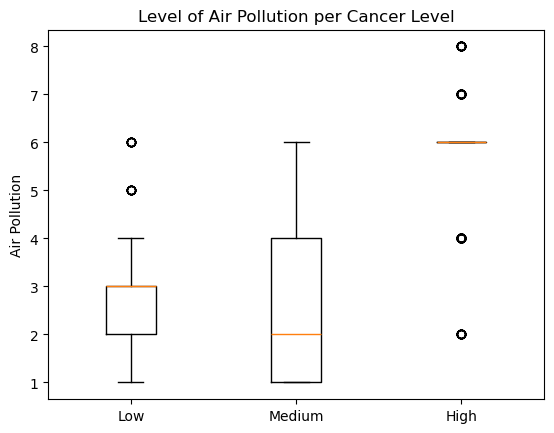

In [59]:
#create a box plot showing level of air pollution to level of cancer
levels = ["Low", "Medium", "High"]
air_pollution = []

for level in levels:
    pollution_value = clean_cancer.loc[clean_cancer["Level"] == level,"Air Pollution"]
    air_pollution.append(pollution_value)
    quartiles = pollution_value.quantile([0.25,0.5,0.75])

plt.ylabel("Air Pollution")
plt.boxplot(air_pollution, labels=levels)
plt.title("Level of Air Pollution per Cancer Level")
plt.show()


In [29]:
#prepare data to plot ratio of men to women
gender_counts = clean_cancer["Gender"].value_counts()
gender_counts

Gender
Male      598
Female    402
Name: count, dtype: int64

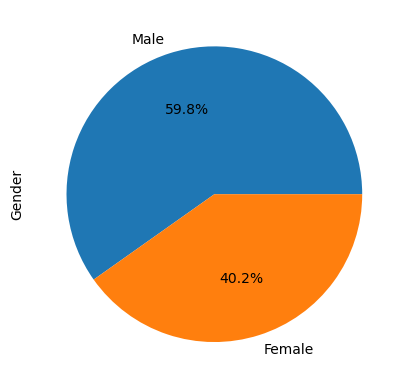

In [33]:
#plot the ratio of men to women in the study
pie_graph = gender_counts.plot(kind="pie", y="Gender", autopct='%1.1f%%')
pie_graph.set_ylabel("Gender")
plt.show()

In [40]:
#create the gender subgroups
male_group = clean_cancer.loc[clean_cancer["Gender"] == "Male"]
female_group = clean_cancer.loc[clean_cancer["Gender"]== "Female"]

In [70]:
#Find the average level of alcohol use, obseity, and smoking for male and female groups
male_alcohol = male_group["Alcohol use"].mean()
female_alcohol = female_group["Alcohol use"].mean()
male_obesity = male_group["Obesity"].mean()
female_obesity = female_group["Obesity"].mean()
male_smoking = male_group["Smoking"].mean()
female_smoking = female_group["Smoking"].mean()


In [68]:
#create function to plot male vs female average risk factors

def plots (y_axis, y_label, title):
    x_axis = ["Male", "Female"]
    colors=["blue", "red"]
    plt.bar(x_axis, y_axis, color=colors)
    plt.ylabel(y_label)
    plt.xlabel("Gender")
    plt.title(title)
    plt.show()


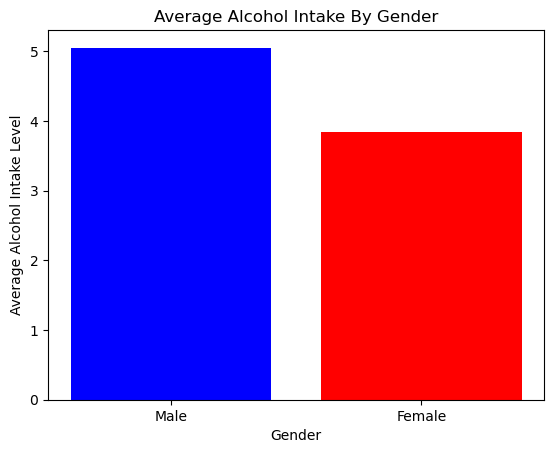

In [69]:
y = [male_alcohol, female_alcohol]
plots (y, "Average Alcohol Intake Level", "Average Alcohol Intake By Gender")

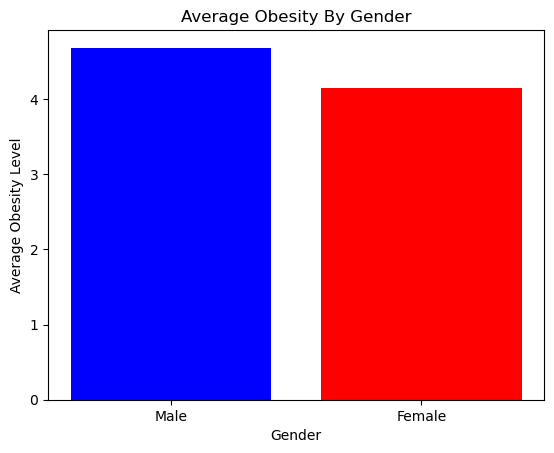

In [72]:
y = [male_obesity, female_obesity]
plots (y, "Average Obesity Level", "Average Obesity By Gender")

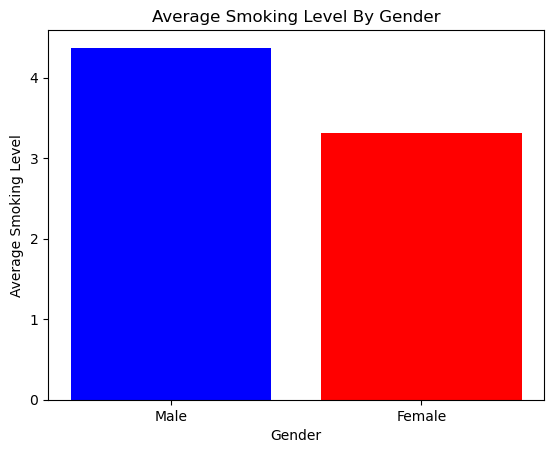

In [73]:
y = [male_smoking, female_smoking]
plots (y, "Average Smoking Level", "Average Smoking Level By Gender")

In [ ]:
clean_caner = clean_cancer.groupby()

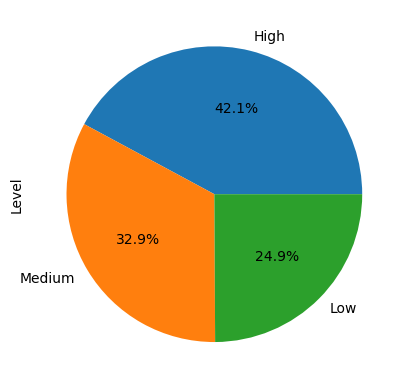

In [76]:
#create a pie chart for each gender to look a levels of cancer per gender
male_levels = male_group["Level"].value_counts()
pie_graph = male_levels.plot(kind="pie", y="Level", autopct='%1.1f%%')
pie_graph.set_ylabel("Level")
plt.show()

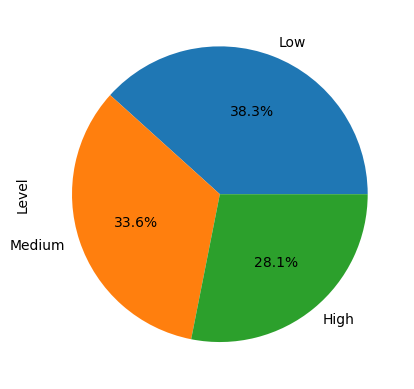

In [77]:
female_levels = female_group["Level"].value_counts()
pie_graph = female_levels.plot(kind="pie", y="Level", autopct='%1.1f%%')
pie_graph.set_ylabel("Level")
plt.show()